In [65]:
#Define Constante
DIR = "/content/drive/MyDrive/Colab Notebooks/UPM/PRDL/EDA/"

#importation
from pandas.plotting import scatter_matrix
from google.colab import drive
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

In [2]:
def importData():
  drive.mount("/content/drive")
  
  #Change directory
  os.chdir(DIR)

  # Read Clinical Data
  OSA_Clinical_df = pd.read_csv("OSA_DB_UPM_Clinical.csv",sep=';',na_values=['-1'])
  OSA_Clinical_df=OSA_Clinical_df.dropna()

  # Now Read Demographical Information
  OSA_Demo_df = pd.read_csv("OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])
  OSA_Demo_df=OSA_Demo_df.dropna()

  # JOIN OSA_Demo_df and OSA_Clinical_df
  OSA_df = pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='inner')

  OSA_df['ID'] = OSA_df['ID'].astype('str')
  OSA_df = OSA_df.set_index('ID')
  return OSA_df

In [3]:
def plotData(df):
    axes = scatter_matrix(df, alpha=0.6, figsize=(12, 8), diagonal='hist')

def getCorr(df):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')
  return corr

---
---

# Scikit-Learn introduction for fitting linear regression models
* # Review the concepts in PRDL Chapter 3



## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Python ML <font color='blue'>sklearn</font> for Multiple Linear Regression

In [4]:
def splitData(dataSet):
  # Splitting into train and test sets

  # Generate the training set.  Set random_state to be able to replicate results.
  train = dataSet.sample(frac=0.8, random_state=1)

  # Select anything not in the training set and put it in the testing set.
  test = dataSet.loc[~dataSet.index.isin(train.index)]

  # Print the shapes of both sets.
  #print(train.shape)
  #print(test.shape)
  
  return train, test

## TRAIN:

In [5]:
def model_training(model, features, output):
  # Fit the model to the training data.
  Trained_model=model.fit(features, output)
  return Trained_model

## Test

In [54]:
def model_testing(model, features, output):
  ### Predicting Error

  # Generate our predictions for the test set.
  predictions = model.predict(features)

  # Compute error between our test predictions and the actual values.
  MSE=mean_squared_error(predictions, output)
  r2_s = r2_score(output, predictions)
                  
  print('Mean squared Error: ', MSE, ' R =  ', r2_s)

  # Explained variance score:
  #print('Variance score: %.2f' % r2_score(output, predictions))

  # Plot outputs
  plt.scatter(output, predictions,  color='red')
  plt.show()

In [7]:
df = importData()

Mounted at /content/drive


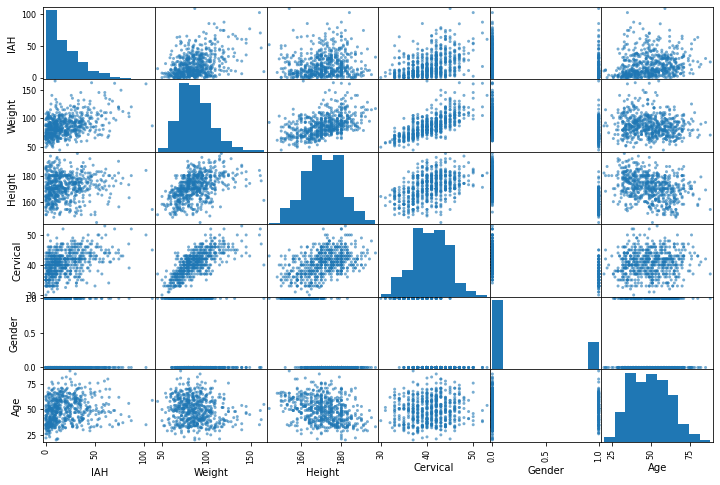

In [8]:
plotData(df)

In [9]:
corr = getCorr(df)
corr.style.background_gradient(cmap='coolwarm')

,IAH,Weight,Height,Cervical,Gender,Age
IAH,1.000000,0.407314,0.104435,0.428931,-0.193713,0.163585
Weight,0.407314,1.000000,0.463731,0.721886,-0.333230,-0.133738
Height,0.104435,0.463731,1.000000,0.459095,-0.676934,-0.326519
Cervical,0.428931,0.721886,0.459095,1.000000,-0.606353,0.089495
Gender,-0.193713,-0.333230,-0.676934,-0.606353,1.000000,0.090490
Age,0.163585,-0.133738,-0.326519,0.089495,0.090490,1.000000


In [13]:
def training_process(model, predictors, target, data):
  print("Model : ", type(model))
  print('Predictor : ', predictors)
  print("Target : ", target)
  #Split Date into Training and testing dataset, Train and Test the model on those
  train, test = splitData(data)
  model = model_training(model, train[predictors], train[target])
  model_testing(model, test[predictors], test[target])

## Frist ML Algoritme : 
### Linear regression on Age, Weight, Height and Cervical

Model :  <class 'sklearn.linear_model._base.LinearRegression'>
Predictor :  ['Weight', 'Height', 'Cervical', 'Gender', 'Age']
Target :  IAH
Mean squared Error:  324.32855212611105  R =   0.1432805661513823


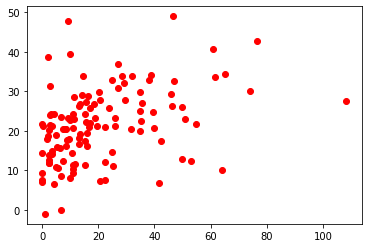

In [55]:
#Define features and output
predictors = ['Weight', 'Height', 'Cervical', 'Gender', 'Age']
target = 'IAH'

# Define the model
model = linear_model.LinearRegression()

training_process(model, predictors, target, df)

## Try improve using "feature" engineering ...  BMI, ....  (log(AHI))

In [17]:
df.head()

,IAH,Weight,Height,Cervical,Gender,Age
ID,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0
4,19.7,78.0,168.0,42.0,0,39.0
5,9.0,80.0,173.0,40.0,0,32.0
6,2.0,109.0,190.0,42.0,0,32.0
7,34.0,86.0,169.0,42.0,0,39.0


In [40]:
df['BMI'] = df['Weight']/(df['Height']**2)*10000

In [41]:
df.head()

,IAH,Weight,Height,Cervical,Gender,Age,BMI
ID,,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0,39.305060
4,19.7,78.0,168.0,42.0,0,39.0,27.636054
5,9.0,80.0,173.0,40.0,0,32.0,26.729927
6,2.0,109.0,190.0,42.0,0,32.0,30.193906
7,34.0,86.0,169.0,42.0,0,39.0,30.110991


In [42]:
corr = getCorr(df)
corr.style.background_gradient(cmap='coolwarm')

,IAH,Weight,Height,Cervical,Gender,Age,BMI
IAH,1.000000,0.407314,0.104435,0.428931,-0.193713,0.163585,0.381927
Weight,0.407314,1.000000,0.463731,0.721886,-0.333230,-0.133738,0.839758
Height,0.104435,0.463731,1.000000,0.459095,-0.676934,-0.326519,-0.080901
Cervical,0.428931,0.721886,0.459095,1.000000,-0.606353,0.089495,0.530051
Gender,-0.193713,-0.333230,-0.676934,-0.606353,1.000000,0.090490,0.029673
Age,0.163585,-0.133738,-0.326519,0.089495,0.090490,1.000000,0.047943
BMI,0.381927,0.839758,-0.080901,0.530051,0.029673,0.047943,1.000000


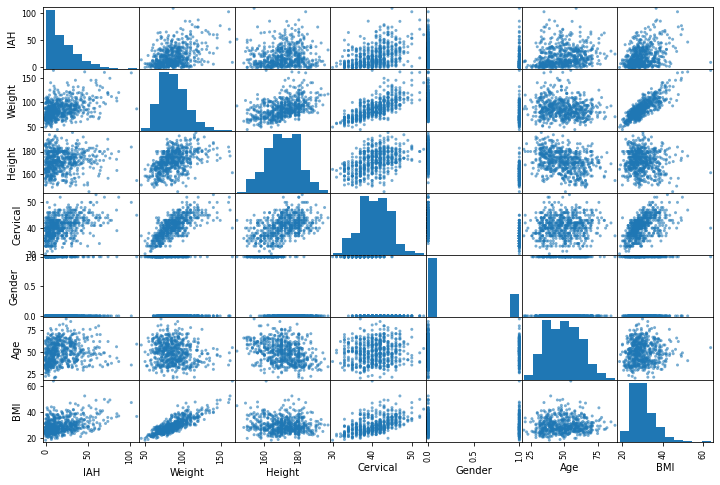

In [43]:
plotData(df)

Model :  <class 'sklearn.linear_model._base.LinearRegression'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  IAH
Mean squared Error:  323.43766056392826  R =   0.14563387149489992


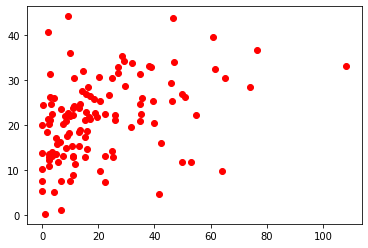

In [56]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'IAH'

# Define the model
model = linear_model.LinearRegression()
training_process(model, predictors, target, df)

Model :  <class 'sklearn.svm._classes.SVR'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  IAH
Mean squared Error:  331.9970435913508  R =   0.12302411440359229


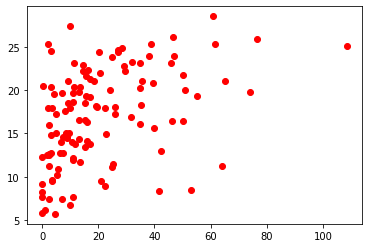

In [57]:
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'IAH'

# Define the model
model = svm.SVR()
training_process(model, predictors, target, df)

Model :  <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  IAH
Mean squared Error:  327.157465575243  R =   0.13580794274940466


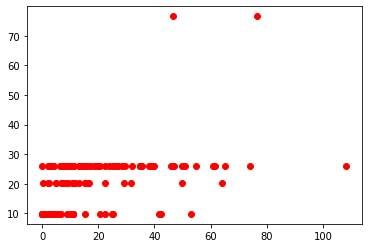

In [63]:
from sklearn import svm
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'IAH'

# Define the model
model = DecisionTreeRegressor(max_depth=2)
training_process(model, predictors, target, df)

Model :  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Predictor :  ['BMI', 'Age', 'Cervical']
Target :  IAH
Mean squared Error:  306.17810436007863  R =   0.1912252852711711


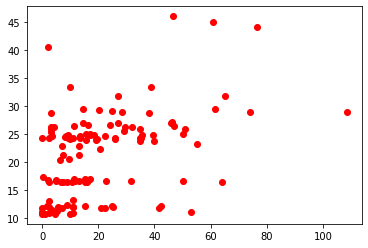

In [69]:
from sklearn import svm
#Define features and output
predictors = ['BMI', 'Age', 'Cervical']
target = 'IAH'

# Define the model
model = RandomForestRegressor(max_depth=2, random_state=0)
training_process(model, predictors, target, df)